In [ ]:
!pip install pandas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
X = pd.read_csv('Dataset/Classification/logisticX.csv')
Y = pd.read_csv('Dataset/Classification/logisticY.csv')
X = X.values # To covert dataframe into numpy array
Y = Y.values

In [10]:
X[:5,:]

array([[3.6898, 6.6051],
       [2.7763, 7.5057],
       [3.1137, 5.7724],
       [2.9251, 5.4315],
       [3.6699, 6.4406]])

In [11]:
# Data Normalisation
u = X.mean(axis=0)
std  = X.std(axis=0)
X = (X-u)/std

In [12]:
X[:5,:]

array([[-0.70739532,  1.49166385],
       [-1.39759229,  2.13781242],
       [-1.14266896,  0.89423113],
       [-1.28516611,  0.64964747],
       [-0.72243081,  1.37364094]])

In [14]:
print(X.mean(axis=0))
print(X.std(axis=0))

[-4.08203213e-16  1.60365548e-16]
[1. 1.]


In [15]:
ones = np.ones((99,1))
X = np.hstack((ones,X))
print(X[:5,:])
print(X.shape)

[[ 1.         -0.70739532  1.49166385]
 [ 1.         -1.39759229  2.13781242]
 [ 1.         -1.14266896  0.89423113]
 [ 1.         -1.28516611  0.64964747]
 [ 1.         -0.72243081  1.37364094]]
(99, 3)


In [88]:
Y.shape

(99, 1)

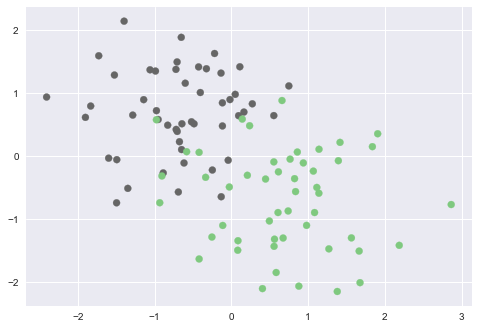

In [16]:
plt.style.use("seaborn")
plt.scatter(X[:,1],X[:,2],c=Y[:,0],cmap=plt.cm.Accent_r)
plt.show()

In [35]:
def sigmoid(z):
    return 1/(1.0 + np.exp(-z))

def getYPred(theta,X):
    return sigmoid(np.dot(X,theta))

def predict(theta,X):
    Y_pred = getYPred(theta,X)
    outputs = np.zeros(Y_pred.shape)
    outputs[Y_pred>=0.5] = 1
    return outputs

def error(X,Y,theta):
    Y_ = getYPred(theta,X)
    e = 0
    m = X.shape[0]
    e = np.sum(Y*np.log(Y_) + (1-Y)*np.log(1-Y_))
    return -e/m

def getGrad(X,Y,theta):
    Y_ = getYPred(theta,X)
    grad = np.dot(X.T,(Y_-Y))
    return grad

In [46]:
def gradDescent(X,Y,lr,itr=200):
    theta = np.zeros((X.shape[1],1))
    error_list = []
    for i in range(itr):
        grad = getGrad(X,Y,theta)
        theta = theta - lr*grad
        e = error(X,Y,theta)
        error_list.append(e)
        
    return theta,error_list

In [47]:
theta,error_list = gradDescent(X,Y,0.01)

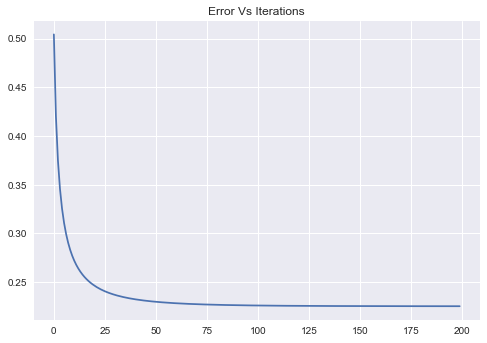

In [48]:
plt.plot(error_list)
plt.title("Error Vs Iterations")
plt.show()

In [49]:
theta,error_list = gradDescent(X,Y,0.01)

In [50]:
theta

array([[ 0.44758903],
       [ 2.51128252],
       [-2.72696067]])

In [52]:
def visualizeSurface():
    plt.scatter(X[:,1],X[:,2],c=Y[:,0],cmap=plt.cm.Accent_r)
    x_1 = np.linspace(-3,3,5)
    x_2 = -(theta[0] + theta[1]*x_1)/theta[2]
    plt.plot(x_1,x_2)
    plt.show()
    

In [53]:
np.linspace(0,10,5) #generate 5 equally spaced numbers in 0 to 10

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

In [54]:
outputs = predict(theta,X)
accuracy = np.sum(outputs==Y)/X.shape[0]
print("%.2f Accuracy"%(accuracy*100))

87.88 Accuracy


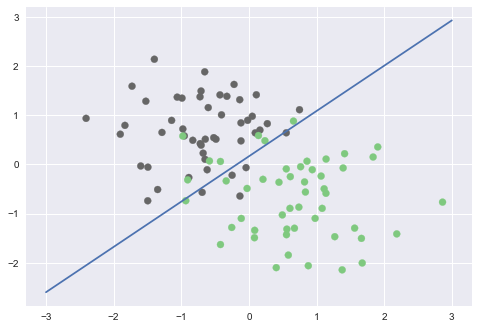

In [55]:
visualizeSurface()

In [56]:
print(theta)

[[ 0.44758903]
 [ 2.51128252]
 [-2.72696067]]


In [36]:
outputs = predict(theta,X)